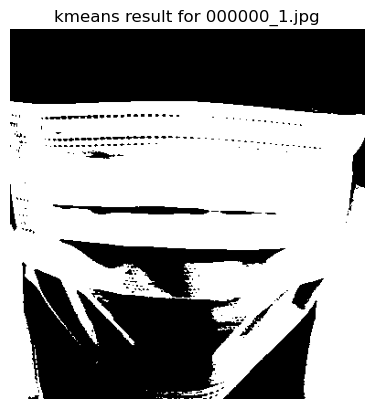

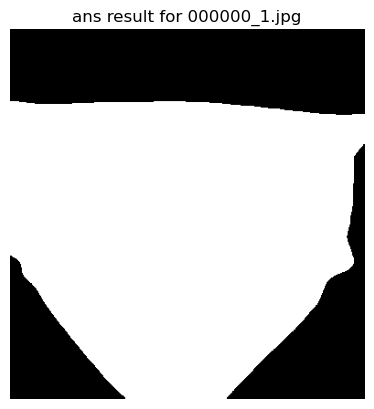

0.6641377734017864
avg score is 0.6641377734017864


In [ ]:
import numpy as np
import pandas as pd
# import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_score
import cv2
import os
from matplotlib import pyplot as plt

# path_to_data = '../../proj_try/dataset2/1/face_crop/'
# path_to_segmented_op = '../../proj_try/dataset2/1/face_crop_segmentation/'

path_to_data = '../datasets/dataset2/1/face_crop/'
path_to_segmented_op = '../datasets/dataset2/1/face_crop_segmentation/'

image_names = os.listdir(path_to_data)
image_names = sorted(image_names)
ans_names = os.listdir(path_to_segmented_op)
ans_names = sorted(ans_names)

def segment_image(img_name, ans_name, show=False, save=True):
    # takes in one image and returns the segmented output i.e. seg and also returns the jaccard score
    img = cv2.imread(path_to_data + img_name)
    seg = cv2.imread(path_to_segmented_op + ans_name)
    original_shape = img.shape
    original_shape = original_shape[:2]
    img = img.reshape(-1,3)
    kmeans = KMeans(n_clusters=2, random_state=17, n_init="auto").fit(img)
    labels = kmeans.labels_
    seg = seg.reshape(-1, 3)
    seg2 = np.zeros((seg.shape[0]))
    for i in range(seg.shape[0]):
        val = seg[i][0]
        if abs(255-val) < abs(val - 0):
            val = 1
        else:
            val = 0
        seg2[i] = val

    seg = seg2
    s1 = jaccard_score(y_true=seg, y_pred=labels)
    s2 = jaccard_score(y_true=seg, y_pred=1-labels)

    score = max(s1, s2)


    if s1 < s2:
        labels = 1 - labels
    
    if show:
        plt.title('kmeans result for ' + img_name)
        plt.axis('off')
        plt.imshow(labels.reshape(original_shape), cmap='gray')
        plt.show()
        plt.close()


        plt.title('ans result for ' + ans_name)
        plt.axis('off')
        plt.imshow(seg.reshape(original_shape), cmap='gray')
        plt.show()
        plt.close()     

    if save:
        plt.title('ans result for ' + ans_name)
        plt.axis('off')
        plt.imshow(labels.reshape(original_shape), cmap='gray')
        plt.savefig(f'./output/kmeans/{img_name}')
        plt.close()    


    return (seg.reshape(original_shape), score)




tot = 0
count = 1
for i in range(0, count):
    seg_pred, score = segment_image(image_names[i], ans_names[i], show=True, save=False)
    print(score)
    tot += score

print('avg score is', tot/count)


# now each pixel has received a label




